<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Sentiment Analysis using VantageCloud Lake on Google and Gemini
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233c'><b>Introduction:</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Sentiment analysis using <b>VantageCloud Lake</b> on <b>Google Cloud</b> and the advanced <b>Gemini</b> model involves leveraging cutting-edge technologies to extract insights from unstructured data. This process empowers businesses to swiftly identify and address customer concerns, enhancing overall customer satisfaction and loyalty.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Key Features:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li><b>Polarity Classification:</b> Identifies specific emotions such as happiness, anger, sadness, and more.</li>
    <li><b>Emotion Detection:</b> The system comprehends the nuances of customer feedback, capturing subtle differences in tone and language.</li>
    <li><b>Aspect-Based Sentiment Analysis:</b>  Analyzes sentiment towards specific features or aspects of a product or service.</li>
    <li><b>Fine-Grained Sentiment Analysis:</b> Provides detailed sentiment analysis at the phrase or clause level.</li>
    <li><b>Subjectivity Classification:</b> Distinguishes between objective and subjective text.</li>

</ul>


<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Benefits:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li><b>Improved Customer Satisfaction:</b> Enhances customer experience by addressing concerns and improving products.</li>
    <li><b>Competitive Advantage:</b> Provides valuable insights to stay ahead of competitors.</li> 
    <li><b>Objective Insights:</b> Offers unbiased and accurate sentiment analysis.</li>
    <li><b>Real-Time Decision Making:</b> Enables swift responses to customer concerns and market trends.</li>
    <li><b>Scalability:</b> Handles large volumes of data efficiently.</li>
</ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'>Experience the transformative power of Generative AI in complaints classification.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'><b>Steps in the analysis:</b></p>
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Create a connection to VCL using teradataml</li>
    <li>Configuring the VCL Environment</li>
    <li>Getting Data for This Demo</li>
    <li>Complaints Sentiment Analysis</li>
    <li>Cleanup</li>
</ol>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>1. Create a connection to VCL using teradataml</b>


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>1.1 Import the required libraries</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we import the required libraries, set environment variables and environment paths (if required).</p>

In [4]:
# Import the Python library teradataml and the specific environment setup modules.
from teradataml import create_context, remove_context, set_config_params
from teradataml import create_env, remove_env, get_env, list_base_envs, list_user_envs
from teradataml import DataFrame, copy_to_sql, Apply, configure, execute_sql
from teradatasqlalchemy.types import BIGINT, VARCHAR, INTEGER, FLOAT, CHAR
from teradataml.options.display import display
from teradataml import set_auth_token

import getpass
import json, os, sys, warnings

warnings.filterwarnings("ignore")
display.print_sqlmr_query = True
display.suppress_vantage_runtime_warnings = True

In [ ]:
# Create the connection
print("Creating the context...")

host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Creating the context...
Host: ········
Username: ········
Password: ········


In [ ]:
# Set the Authentication token to connect to User Environment Service (UES) in VantageCloud Lake.
ues_url = r"https://vmo.staging.innovationlabs.teradata.com/api/accounts/c1685411-eb18-4a19-8a02-aa0f20d7dff1/open-analytics"
set_auth_token(ues_url=ues_url)

Opening the browser with URL - https://vmo.staging.innovationlabs.teradata.com/auth/as/user_authz.oauth2?user_code=6P8M-7Y8G

Opened a session in browser. Authenticate yourself in the browser. In case if not able to access the opened session in browser, Open a session in any browser on any machine using URL - https://vmo.staging.innovationlabs.teradata.com/auth/as/user_authz.oauth2?user_code=6P8M-7Y8G


True

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>2. Configuring the VCL Environment</b>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>2.1 Create a new user environment</b></p>

In [ ]:
# Use Environment setup
# Create a new user environment
# create a new python user environment for python 3.10.
demo_env = create_env(
    env_name="oaf_demo", base_env="python_3.10", desc="OAF Demo env for LLM"
)

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>2.2 Install required libraries to run inference script</b></p>

Create `requirement.txt` file with following libraries
```
langchain==0.2.1
wordcloud==1.9.3
google-generativeai==0.5.4
```

In [ ]:
# Install libraries
demo_env.install_lib(libs_file_path="requirement.txt")

Claim Id  File/Libs/Model  Method Name  \
0  898069cf-904e-4c92-812a-432f838574d5  requirement.txt  install_lib   
1  898069cf-904e-4c92-812a-432f838574d5  requirement.txt  install_lib   

      Stage             Timestamp Additional Details  
0   Started  2024-04-17T03:35:00Z                     
1  Finished  2024-04-17T03:43:39Z

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>2.3 Install complaints classification script</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'>To optimize our workflow, we're implementing a two-step process to deploy our script code. This approach ensures seamless integration and minimizes environmental disruptions.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'>First, we export our script code to a <code>.py</code> file, consolidating it into a single, portable file for easy management and maintenance. Then, we install the exported script code into a remote environment, ensuring it's properly configured and ready for execution.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'>This structured approach simplifies code management, allows for environment flexibility, and reduces downtime, resulting in improved productivity and fewer errors.</p>

In [ ]:
# %load sentiment_analysis_oaf.py

#!/usr/bin/env python3
import sys
import warnings
import google.generativeai as genai
import os
import pandas as pd
from tqdm import tqdm
import re

# For LLM
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])
from google.generativeai.types import HarmCategory, HarmBlockThreshold

warnings.simplefilter("ignore")

delimiter = "#"
inputData = []

for line in sys.stdin.read().splitlines():
    line = line.split(delimiter)
    inputData.append(line)

if not inputData:
    sys.exit()

columns = [
    "date_received",
    "product",
    "sub_product",
    "issue",
    "sub_issue",
    "consumer_complaint_narrative",
    "company_public_response",
    "company",
    "state",
    "zip_code",
    "tags",
    "consumer_consent_provided",
    "submitted_via",
    "date_sent_to_company",
    "company_response_to_consumer",
    "timely_response",
    "consumer_disputed",
    "id",
]

raw_data = pd.DataFrame(inputData, columns=columns).copy()

del inputData

# Define the gemini model
model = genai.GenerativeModel(
    model_name="models/gemini-1.5-pro-latest",
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    },
)


def sentiment_analysis(df):
    for i in tqdm(range(len(df))):
        prompt = f"""
        User prompt: 
        The following is text from a review:

        "{df['consumer_complaint_narrative'][i]}"

        Categorize the review as one of the following:

        Positive
        Negative
        Neutral
        """
        response = model.generate_content(prompt)
        df["Sentiment"][i] = response
    return df


response_df = sentiment_analysis(raw_data)

for index, row in response_df.iterrows():
    print(
        str(row["date_received"]),
        delimiter,
        str(row["product"]),
        delimiter,
        str(row["sub_product"]),
        delimiter,
        str(row["issue"]),
        delimiter,
        str(row["sub_issue"]),
        delimiter,
        str(row["consumer_complaint_narrative"]),
        delimiter,
        str(row["company_public_response"]),
        delimiter,
        str(row["company"]),
        delimiter,
        str(row["state"]),
        delimiter,
        str(row["zip_code"]),
        delimiter,
        str(row["tags"]),
        delimiter,
        str(row["consumer_consent_provided"]),
        delimiter,
        str(row["submitted_via"]),
        delimiter,
        str(row["date_sent_to_company"]),
        delimiter,
        str(row["company_response_to_consumer"]),
        delimiter,
        str(row["timely_response"]),
        delimiter,
        str(row["consumer_disputed"]),
        delimiter,
        str(row["id"]),
        delimiter,
        str(row["Sentiment"]),
    )

In [ ]:
# Install complaints classification script
demo_env.install_file(file_path="sentiment_analysis_oaf.py")

File 'sentiment_analysis_oaf.py' installed successfully in the remote user environment 'oaf_demo'.


True

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>3. Getting Data for This Demo</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. We have the option of either running the demo using foreign tables to access the data without using any storage on our environment or downloading the data to local storage, which may yield somewhat faster execution. However, we need to consider available storage. There are two statements in the following cell, and one is commented out. We may switch which mode we choose by changing the comment string.</p>

In [ ]:
# %run -i ../run_procedure.py "call get_data('DEMO_ComplaintAnalysis_cloud');"        # Takes 1 minute
%run -i ../run_procedure.py "call get_data('DEMO_ComplaintAnalysis_local');"        # Takes 2 minutes

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>4. Complaints Sentiment Analysis</b>

<p style="font-size:16px;font-family:Arial;color:#00233C">We'll analyze the sentiments of a sample of customer complaints data.</p>

In [ ]:
tdf = DataFrame(in_schema("DEMO_ComplaintAnalysis", "Consumer_Complaints"))
tdf = tdf.assign(id=tdf.complaint_id).drop("complaint_id", axis=1)
tdf

date_received                                                                       product                                 sub_product                                                    issue                                                                              sub_issue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              consumer_complaint_narrative company_public_response        company state zip_code            tags consumer_consent_provided submitted_via date_sent_to_company company_response_to_consumer timely_response consumer_disputed       id
0    01-22-2022                                                               Debt collection                            Credit card debt                        Attempts to collect debt not owed                                                      Debt was result of identity theft                                                                                                                                                                                                                                                                                                                                                                                                      I am having a identity theft issue that I am not able to resolve directly with the credit reporting agencies or the companies. I have decided to file complaint for myself in hopes that the back and forth ends here. I have already open a case with the US Federal Courts to assist me with the suffering this has caused. I had to do my own research into the matter and I find that the credit reporting agencies reporting fraudulent accounts to my credit file without my permission is a consumer law violation per 15 USC 1681 ( b ). DISCOVER is a inaccurate account on my credit file and is not mine.                    None  DISCOVER BANK    KY    41501            None          Consent provided           Web           01/22/2022      Closed with explanation             Yes              None  5137473
1    01-23-2022                                                   Credit card or prepaid card  General-purpose credit card or charge card                              Struggling to pay your bill  Credit card company won't work with you while you're going through financial hardship                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.1 Run Apply Query to execute complaints sentiment analysis script</b></p>

In [ ]:
apply_obj = Apply(
    data=tdf,
    apply_command="python sentiment_analysis_oaf.py",
    returns={
        "date_received": VARCHAR(10000),
        "product": VARCHAR(10000),
        "sub_product": VARCHAR(10000),
        "issue": VARCHAR(10000),
        "sub_issue": VARCHAR(10000),
        "consumer_complaint_narrative": VARCHAR(10000),
        "company_public_response": VARCHAR(10000),
        "company": VARCHAR(10000),
        "state": VARCHAR(10000),
        "zip_code": VARCHAR(10000),
        "tags": VARCHAR(10000),
        "consumer_consent_provided": VARCHAR(10000),
        "submitted_via": VARCHAR(10000),
        "date_sent_to_company": VARCHAR(10000),
        "company_response_to_consumer": VARCHAR(10000),
        "timely_response": VARCHAR(10000),
        "consumer_disputed": VARCHAR(10000),
        "id": VARCHAR(10000),
        "Sentiment": VARCHAR(10000),
    },
    env_name=demo_env,
    delimiter="#",
)

In [15]:
df_pred = apply_obj.execute_script()
df = df_pred.to_pandas().reset_index()
df['Sentiment'] = df['Sentiment'].apply(lambda x: x.strip())

In [16]:
df[['complaint_id', 'consumer_complaint_narrative', 'Sentiment']]

complaint_id                       consumer_complaint_narrative  \
0          8066305  In accordance with the Fair Credit reporting a...   
1          8110504  Worked with discover card on a settlement due ...   
2          7964325  I, XXXX XXXX, the consumer and natural person,...   
3          8020111  I went through a very difficult period in my l...   
4          8063865  I paid for a summer camp in advance for my son...   
...            ...                                                ...   
7075       7904624  A charge-off was reported at the beginning of ...   
7076       7905092  I have been a victim of identity theft and my ...   
7077       7902349  Recent dispute with Discover to removed charge...   
7078       7907553  Discover Bank, I have trouble recognizing an a...   
7079       7907812  Discovery XXXX {$1500.00} This item is reporti...   

     Sentiment  
0     Negative  
1     Negative  
2     Negative  
3     Negative  
4     Negative  
...        ...  
7075  Negative  
7076  Negative  
7077  Negative  
7078  Negative  
7079  Negative  

[7080 rows x 3 columns]

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Save the results back to Vantage.</p>

In [17]:
copy_to_sql(df = df, table_name = 'complaints_sentiment', if_exists = 'replace')

In [18]:
sentiment_df = DataFrame('complaints_sentiment')
sentiment_df = sentiment_df.assign(date_received = sentiment_df.date_received.cast(type_=DATE))
print('Before: ', sentiment_df.shape)
sentiment_df = sentiment_df.loc[sentiment_df.Sentiment.isin(['Positive', 'Negative', 'Neutral'])]
print('After: ', sentiment_df.shape)

Before:  (7080, 19)
After:  (7075, 19)


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.2 Consumer Sentiments Prediction vs Occurrences</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233c'>A graph illustrating the relationship between consumer sentiments (positive, negative, neutral) prediction and the number of occurrences. This visual representation helps identify trends, patterns, and areas for improvement, enabling data-driven decision making.</p>

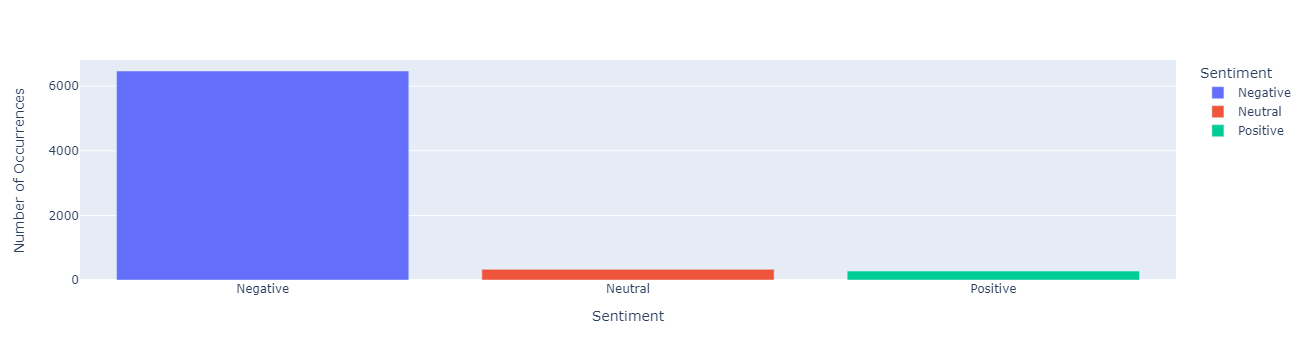

In [19]:
from collections import Counter
data = Counter(sentiment_df[['Sentiment']].get_values().flatten())

# Convert Counter data to DataFrame
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count']).reset_index()

# Rename columns
df.columns = ['Sentiment', 'Count']

# Create bar graph using Plotly Express
fig = px.bar(df, x='Sentiment', y='Count', color='Sentiment',
             labels={'Count': 'Number of Occurrences', 'Sentiment': 'Sentiment'})

# Show the plot
fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.3 Word Cloud for Negative Consumer Sentiment Prediction</b></p>

<p style='font-size:16px;font-family:Arial;color:#00233c'> Unlock the power of customer feedback with our intuitive word cloud visualization, which provides a comprehensive snapshot of <b>negative consumer complaints sentiment</b>. This innovative tool highlights the most frequently occurring words and pain points in customer feedback, empowering businesses to: </p> <ol style='font-size:16px;font-family:Arial;color:#00233c'> <li>Identify trends and sentiment patterns</li> <li>Pinpoint areas for improvement</li> <li>Make data-driven decisions to enhance customer satisfaction and loyalty</li> </ol> <p style='font-size:16px;font-family:Arial;color:#00233c'> By leveraging this word cloud, businesses can proactively address customer concerns, refine their products and services, and ultimately drive growth through a deeper understanding of their customers' needs and preferences. </p>

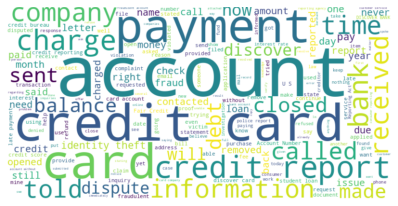

In [23]:
neg = sentiment_df[sentiment_df['Sentiment'] == 'Negative'].to_pandas()
neg_text = ' '.join(neg['consumer_complaint_narrative'])

# Replace 'X' with blank space
modified_string = neg_text.replace('X', '').replace('Discover', '')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modified_string)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout()
plt.axis("off")
plt.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.4 Word Cloud for Neutral Consumer Sentiment Prediction</b></p>

<p style='font-size:16px;font-family:Arial;color:#00233c'>Tap into the insights of customer feedback with our intuitive word cloud visualization, which offers a detailed overview of <b>neutral consumer complaints sentiment</b></p>

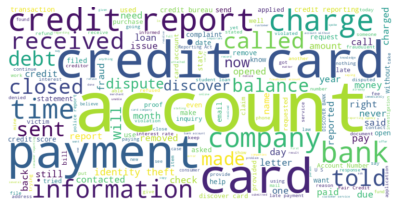

In [25]:
neu = sentiment_df[sentiment_df['Sentiment'] == 'Neutral'].to_pandas()
neu_text = ' '.join(neu['consumer_complaint_narrative'])

# Replace 'X' with blank space
modified_string = neg_text.replace('X', '').replace('Discover', '')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modified_string)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout()
plt.axis("off")
plt.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.5 Word Cloud for Positive Consumer Sentiment Prediction</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233c">Explore customer feedback insights with our intuitive word cloud visualization, providing a detailed overview of consumer sentiment.</p>

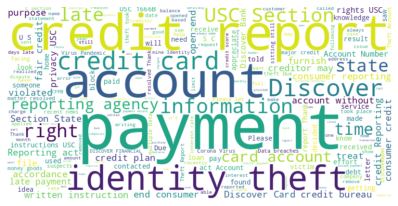

In [22]:
pos = sentiment_df[sentiment_df['Sentiment'] == 'Positive'].to_pandas()
pos_text = ' '.join(pos['consumer_complaint_narrative'])

# Replace 'X' with blank space
modified_string = pos_text.replace('X', '')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(modified_string)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout()
plt.axis("off")
plt.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.6 Negative Sentiment per Product Over Years</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233c">This graph tracks the negative sentiment  associated with different products over time, offering valuable insights into evolving customer perceptions and pain points.</p>

<p style="font-size:16px;font-family:Arial;color:#00233c">We will use <b>Vantage in-db</b> function <b>OrdinalEncodingFit</b> which will identifies distinct categorical values from the input data or a user-defined list and generates the distinct categorical values along with the ordinal value for each category.<p?

In [23]:
ordinal_fit = OrdinalEncodingFit(data=sentiment_df,
                                 target_column=['Sentiment'],
                                 approach = 'LIST',
                                 categories = ['Negative', 'Neutral', 'Positive']
                                )

ordinal_fit.result

TD_ColumnName_ORDFIT TD_Category_ORDFIT  TD_Value_ORDFIT  TD_Index_ORDFIT Sentiment
0            Sentiment           Positive                2                0      None
1            Sentiment  TD_CATEGORY_COUNT                3               -1      None
2            Sentiment            Neutral                1                0      None
3            Sentiment           Negative                0                0      None

In [24]:
out = ColumnTransformer(input_data=sentiment_df[['date_received', 'product', 'Sentiment']], ordinalencoding_fit_data=ordinal_fit.result)

In [27]:
result = out.result
result = result.assign(Sentiment = result.Sentiment - 1)
result = result.assign(year = func.td_year_of_calendar(result.date_received.expression))
result

date_received                                                                       product  Sentiment  year
0      23/12/08                                                                   Credit card         -1  2023
1      23/12/27                                                                   Credit card         -1  2023
2      18/01/14  Credit reporting, credit repair services, or other personal consumer reports         -1  2018
3      18/02/18                                                               Debt collection         -1  2018
4      18/03/19                                                   Credit card or prepaid card          0  2018

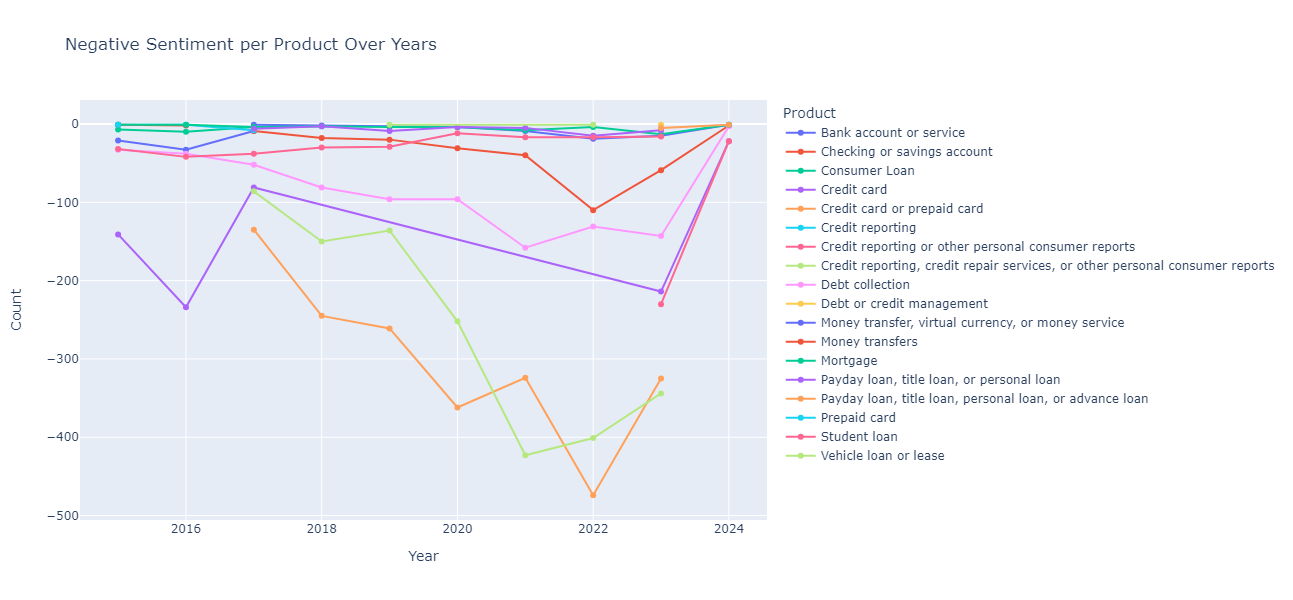

In [28]:
viz_neg = result[result['Sentiment'] == -1]

viz_senti = viz_neg.select(['product','Sentiment', 'year']).groupby(['product', 'year']).agg(['sum']).to_pandas()

# Sorting the DataFrame by year for each product
pd_df_sorted = viz_senti.sort_values(by=['product', 'year'])

# Plotting using Plotly
fig = px.line(pd_df_sorted, x='year', y='sum_Sentiment', color='product', markers=True, title='Negative Sentiment per Product Over Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Count', legend_title='Product', width=1000, height=600)

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.7 Neutral Sentiment per Product Over Years</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233c">This graph tracks the neutral sentiment  associated with different products over time, offering valuable insights into evolving customer perceptions and pain points.</p>

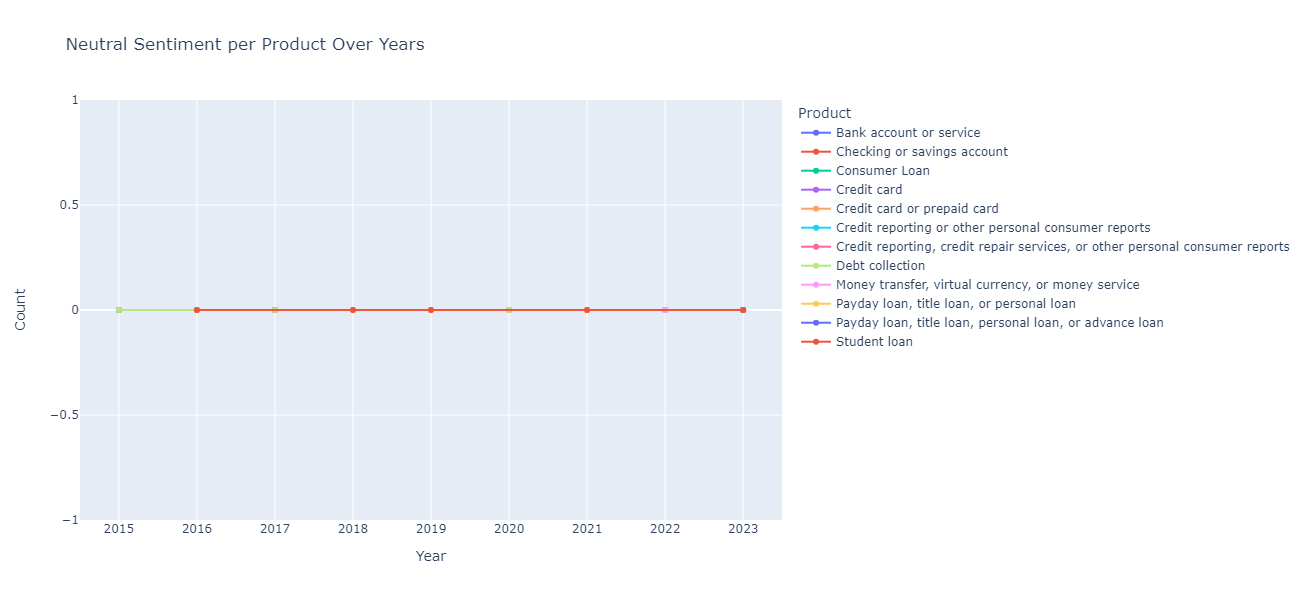

In [29]:
viz_neg = result[result['Sentiment'] == 0]

viz_senti = viz_neg.select(['product','Sentiment', 'year']).groupby(['product', 'year']).agg(['sum']).to_pandas()

# Sorting the DataFrame by year for each product
pd_df_sorted = viz_senti.sort_values(by=['product', 'year'])

# Plotting using Plotly
fig = px.line(pd_df_sorted, x='year', y='sum_Sentiment', color='product', markers=True, title='Neutral Sentiment per Product Over Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Count', legend_title='Product', width=1000, height=600)

fig.show()

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>4.8 Positive Sentiment per Product Over Years</b></p>

<p style="font-size:16px;font-family:Arial;color:#00233c">This graph tracks the positive sentiment  associated with different products over time, offering valuable insights into evolving customer perceptions and pain points.</p>

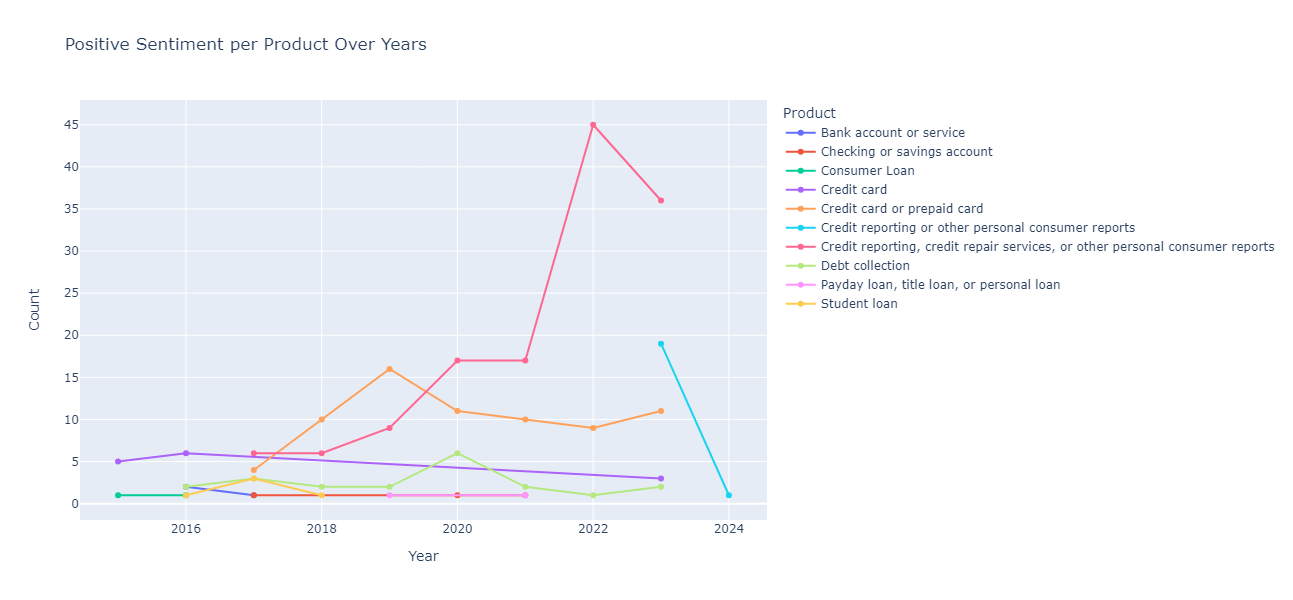

In [30]:
viz_neg = result[result['Sentiment'] == 1]

viz_senti = viz_neg.select(['product','Sentiment', 'year']).groupby(['product', 'year']).agg(['sum']).to_pandas()

# Sorting the DataFrame by year for each product
pd_df_sorted = viz_senti.sort_values(by=['product', 'year'])

# Plotting using Plotly
fig = px.line(pd_df_sorted, x='year', y='sum_Sentiment', color='product', markers=True, title='Positive Sentiment per Product Over Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Count', legend_title='Product', width=1000, height=600)

fig.show()

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>5. Cleanup</b>

In [ ]:
remove_context()

<hr style="height:1px;border:none;background-color:#00233C;">
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Dataset:</b>
<br>
<br>
<p style='font-size: 16px; font-family: Arial; color: #00233C;'>The dataset is sourced from <a href='https://www.consumerfinance.gov/data-research/consumer-complaints/'>Consumer Financial Protection Bureau</a></p>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2024. All Rights Reserved
        </div>
    </div>
</footer>